In [44]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt

In [45]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [46]:
 df = pd.read_csv('/content/gdrive/MyDrive/fraudTest copy.csv')


In [47]:
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,6/21/20 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,3/19/68,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,6/21/20 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1/17/90,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,6/21/20 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",10/21/70,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,6/21/20 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,7/25/87,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,6/21/20 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,7/6/55,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,12/31/20 23:59,3.056060e+13,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,2/13/66,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,12/31/20 23:59,3.556610e+15,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,12/27/99,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,12/31/20 23:59,6.011720e+15,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,11/29/81,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,12/31/20 23:59,4.079770e+12,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,12/15/65,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


2.) Select four columns to use as features (one just be trans_date_trans)

In [48]:
df["trans_date_trans_time"] = pd.to_datetime(df["trans_date_trans_time"])

In [49]:
df_select = df[["trans_date_trans_time","category","amt","city_pop","is_fraud"]]

3.) Create a unique variable out of trans_date. Create dummies for
string variables

In [50]:
type(df["trans_date_trans_time"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [51]:
df_select["time_var"] = [i.second for i in df["trans_date_trans_time"]]

<ipython-input-51-855a9cbdedbb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = [i.second for i in df["trans_date_trans_time"]]


In [52]:
 dummies = pd.get_dummies(df_select["category"]) 
 X = pd.concat([dummies, df_select[["amt","city_pop","time_var"]]], axis = 1) 
 y = df_select["is_fraud"]

In [53]:
X.head()

,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel,amt,city_pop,time_var
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2.86,333497,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,29.84,302,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,41.28,34496,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,60.05,54767,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3.19,1126,0


In [54]:
from imblearn.over_sampling import RandomOverSampler 
import statsmodels.api as sm
ros = RandomOverSampler(random_state = 0)
X_resampled, y_resampled = ros.fit_resample(X, y)

5.) Train a Logistic regression.

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)

In [58]:
log_reg= LogisticRegression().fit(X_train,y_train)

In [59]:
y_pred = log_reg.predict(X_test)

In [60]:
print('Accuracy:', log_reg.score(X_test, y_test))

Accuracy: 0.5629950774511132


6.) The company you are working for wants to target at a False Positive rate of 5% what threshold should you use? (Use oversampled data)

In [61]:
from sklearn.metrics import confusion_matrix, roc_curve
import numpy as np

y_pred_proba = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_pred, y_pred_proba)

# Find the threshold that gives a false positive rate of 5%
threshold = thresholds[np.where(fpr <= 0.05)[0][-1]]

threshold_test = [(i+1)/1000 for i in range(1000)] 
thershold_list = []
false_negative_rate_list = []

for threshold in threshold_test:
  y_pred = (y_pred_proba > threshold).astype(int)
  tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel() 
  false_negative_rate = fn / (fn + tp)
  if false_negative_rate <= 0.05:
      thershold_list.append(threshold)
      false_negative_rate_list.append(false_negative_rate)


7.) If the company makes .02*amt on True transactions and loses -amt
on False (Use original data)

In [63]:
# Make predictions with trained model
y_pred_proba_or = log_reg.predict_proba(X)[:, 1]
y_pred_or = (y_pred_proba_or > 0.205).astype(int) # Using the results above
# Integrate the results into the original data
df['predictions'] = y_pred_or
# Get TN, FP, TP, FN
df_t = df[df["is_fraud"] == df["predictions"]].copy()
df_f = df[df["is_fraud"] != df["predictions"]].copy()
df_t["Gain or loss"] = 0.2 * df_t["amt"]
df_f["Gain or loss"] = -1 * df_f["amt"]
revenue = df_t["Gain or loss"].sum() + df_f["Gain or loss"].sum()
revenue

-36378312.194000006

In [64]:
thershold_list[-1]

0.502

8.) Using Logistic Regression Lasso to inform you. Would you use the selected features in a trusted prediction model?

In [67]:
log_res_Lasso = LogisticRegression("l1", solver = 'liblinear')
log_res_Lasso.fit(X_train, y_train)
log_res_Lasso.coef_

array([[-2.78890160e+00, -1.06325675e+00, -1.76248312e-02,
        -2.14638203e-01, -8.55900178e-01, -7.32829791e-01,
        -1.68457722e+00, -8.23471417e-01, -3.56152818e+00,
        -6.25388521e-01, -4.57708155e-01, -4.71676165e+00,
        -4.53920318e+00, -7.57907963e-02,  1.05091518e-02,
        -5.39245450e-07,  0.00000000e+00]])

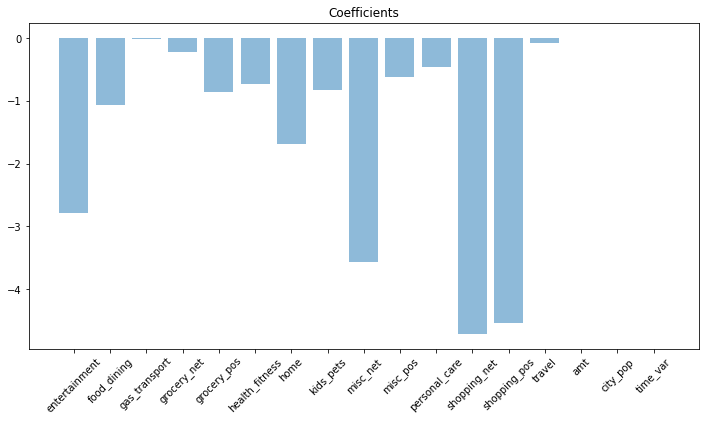

In [68]:
objects = list(X_train.columns)
plt.figure(figsize = (12, 6))
plt.bar(objects, log_res_Lasso.coef_[0], align='center', alpha = 0.5)
plt.xticks(objects, rotation=45)
plt.title('Coefficients')
plt.show()

Conclusion: from the result, most of the coefficients are significant influential to the regression, while "grocery_net","city_pop" are close to zero, which has super small influence, which can be abandoned to optimize the model， and I would use the selected features for the model